# Statistical Learning - Project #2

1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# This is solution to Question 1

2. Read the data as a data frame

In [3]:
ins_df = pd.read_csv('insurance.csv')
# This is solution to Question 2

3. Perform basic EDA which should include the following and print out your insights at every step

In [4]:
ins_df.head(10)
# seeing the data head for an overview

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


3a. Shape of the data  

In [5]:
ins_df.shape
# This dataset has 1338 rows and 7 columns

(1338, 7)

3b. Data type of each attribute

In [6]:
ins_df.info()
# 'age','bmi','children',and 'charges' are columns with numerical values
# 'sex','smoker', and 'children' are columns with categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [7]:
for col in ['sex', 'smoker', 'region']:
    ins_df[col] = ins_df[col].astype('category')
# converting object columns into categories for memory optimization

In [8]:
ins_df.info()
# checking if conversion was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(3), float64(2), int64(2)
memory usage: 46.0 KB


3c. Checking the presence of missing values

In [9]:
ins_df.isnull().sum()
# There are no null values or missing values in the dataset
# Checked the file in MS Excel as well to find if any erroneous values are present

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

3d. 5 point summary of numerical attributes

In [10]:
ins_df.describe().transpose()
# 'age','bmi' and 'children' have negligible difference in mean and median - meaning no skew
# 'charges' has a huge range when compared to other parameters
# 'charges' also has mean > median, meaning it has a significant right-skew

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

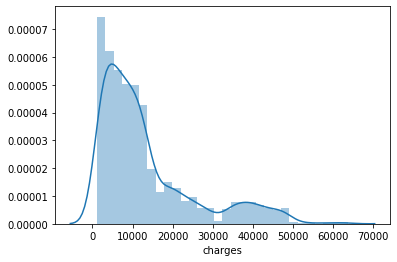

In [11]:
sns.distplot(ins_df['charges'])
# This plot confirms claim made in the previous line - there is infact a big right tail/skew for 'charges'

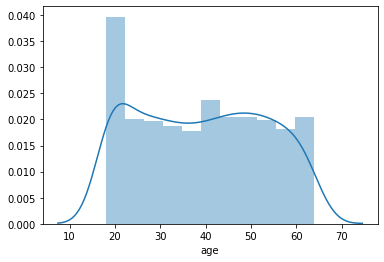

In [12]:
sns.distplot(ins_df['age'])
# This plot shows that 'age' follows a bimodal and nearly normal distribution

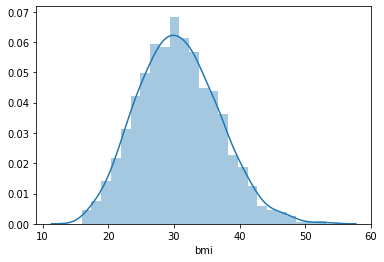

In [13]:
sns.distplot(ins_df['bmi'])
# This plot shows that 'bmi' follows a nearly perfect normal distribution

3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [14]:
ins_df.skew()
# Normal distribution has 0 skewness
# The skeness values below confirm that 'age' and 'bmi' have negligible right skew
# 'children' has moderate right skewness and 'charges' is highly right skewed

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

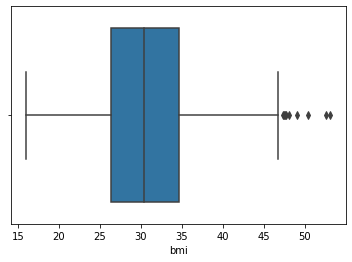

In [15]:
sns.boxplot(ins_df['bmi'])
# 'bmi' clearly has some outliers which can be seen as dots in the boxplot below

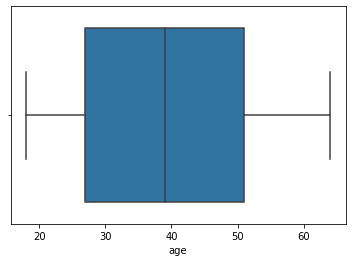

In [16]:
sns.boxplot(ins_df['age'])
# 'age' doesn't have any outliers as can be seen from below boxplot

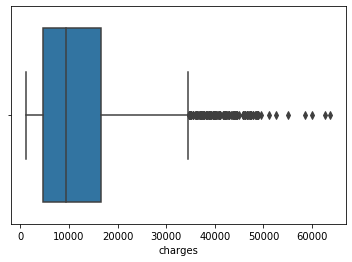

In [17]:
sns.boxplot(ins_df['charges'])
# 'charges' clearly has many outliers which can be seen as dots in the boxplot below

3h. Distribution of categorical columns (include children)

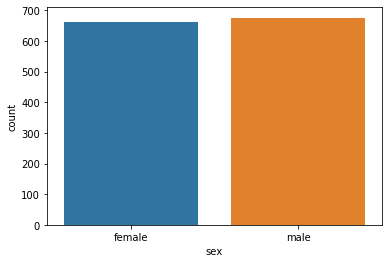

In [18]:
sns.countplot(ins_df['sex'])
# There almost equal number of males and females in the dataset as can be seeen from below countplot

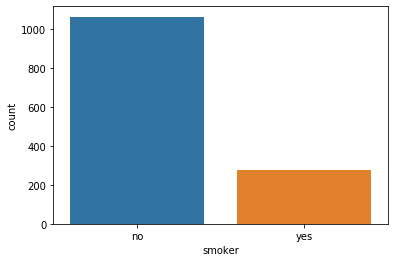

In [19]:
sns.countplot(ins_df['smoker'])
# There are high number of non-smokers in the dataset as compared to the smokers
# This can produce a bias if we build a model on the 'smoker' feature due to unequal class representation

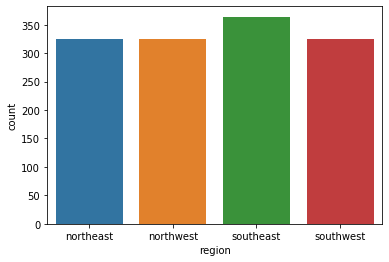

In [20]:
sns.countplot(ins_df['region'])
# There are equal numbers of data points across all regions except South-East which has higher frequency

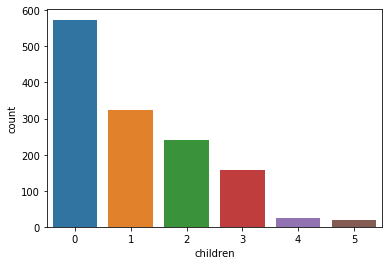

In [21]:
sns.countplot(ins_df['children'])
# There are high number of data points with 0-3 children and only a few cases where children are 4-5

3i. Pair plot that includes all the columns of the dataframe

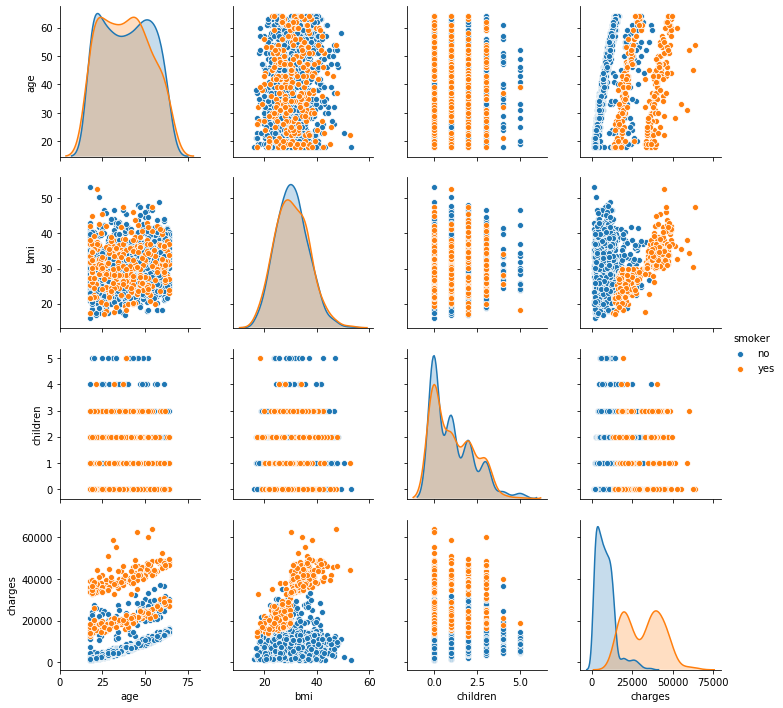

In [22]:
sns.pairplot(ins_df, hue='smoker')

4. Answer the following questions with statistical evidence

4a. Do charges of people who smoke differ significantly from the people who don't?

In [23]:
charges_ns = ins_df[ins_df['smoker'] == 'no']['charges']
charges_s = ins_df[ins_df['smoker'] == 'yes']['charges']

In [24]:
from scipy.stats import shapiro
print(shapiro(charges_ns)) 
print(shapiro(charges_s))

(0.8728628158569336, 1.4456359978073569e-28)
(0.9395521879196167, 3.6251879276250065e-09)


In [25]:
# From shapiro test, it is clear that pvalue < 0.05 meaning data doesn't follow a normal distribution
# Hence, a T-test won't be correct here

In [26]:
from scipy.stats import mannwhitneyu
mannwhitneyu(charges_ns,charges_s)
# Using Mann Whitney U test here since data is not normally distributed

MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

In [27]:
# In this test, we have a null-hypothesis that charges for smokers and non-smokers have the same mean 
# Since pvalue is significantly lower than alpha = 0.05, we can reject the null hypothesis
# In other words, we can say:
# "There is statistically significant difference in charges for smokers and non-smokers at 95% confidence"

4b. Does bmi of males differ significantly from that of females?

In [28]:
bmi_m = ins_df[ins_df['sex'] == 'male']['bmi']
bmi_f = ins_df[ins_df['sex'] == 'female']['bmi']

In [29]:
from scipy.stats import shapiro
print(shapiro(bmi_f))
print(shapiro(bmi_m))

(0.9930257797241211, 0.0035433683078736067)
(0.9930475354194641, 0.0031306506134569645)


In [30]:
# From shapiro test, it is clear that pvalue < 0.05 meaning data doesn't follow a normal distribution
# Hence, a T-test won't be correct here

In [31]:
mannwhitneyu(bmi_f,bmi_m)
# Using Mann Whitney U test here since data is not normally distributed 

MannwhitneyuResult(statistic=212180.0, pvalue=0.05070064020142721)

In [32]:
# In this test, we have null-hypothesis that bmi is the same for males and females
# Since pvalue is greater/equal to than alpha = 0.05, we fail to reject the null hypothesis
# In other words, we can say:
# "There is no statistically significant difference in bmi for males and females at 95% confidence"

4c. Is the proportion of smokers significantly different in different genders?

In [33]:
ins_df[ins_df['sex'] == 'male'].smoker.value_counts()

no     517
yes    159
Name: smoker, dtype: int64

In [34]:
male_smokers = ins_df[ins_df['sex'] == 'male'].smoker.value_counts()[1]
female_smokers = ins_df[ins_df['sex'] == 'female'].smoker.value_counts()[1]
male_count = ins_df.sex.value_counts()[0]
female_count = ins_df.sex.value_counts()[1]

In [35]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([male_smokers,female_smokers],[male_count,female_count])

(3.175210869842791, 0.0014972765106018393)

In [36]:
# In this test, we have null-hypothesis that proportion of smokers is same across both the genders
# Since pvalue is lesser than alpha = 0.05, we can reject the null hypothesis
# In other words, we can say:
# "There is statistically significant difference in the proportion of smokers between males and females, at 95% confidence""

4d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [37]:
df_females = ins_df[ins_df['sex'] == 'female']
b0 = df_females[df_females['children'] ==  0].bmi
b1 = df_females[df_females['children'] ==  1].bmi
b2 = df_females[df_females['children'] ==  2].bmi

In [44]:
print(shapiro(b0))
print(shapiro(b1))
print(shapiro(b2))

(0.9896312355995178, 0.03757598251104355)
(0.9921025037765503, 0.5361911654472351)
(0.9860439300537109, 0.2596229910850525)


In [46]:
# From shapiro test, it is clear that pvalue > 0.05 meaning 2 of the series follow a near-normal distribution
# Hence, a Kruskal Wallis test won't be correct here

In [50]:
subset_df = ins_df[((ins_df['children'] <= 2) & (ins_df['sex'] == 'female'))]
subset_df = subset_df.drop(['age','sex','smoker','region','charges'], axis=1)
subset_df
# taking subset of data which we want to compare

,bmi,children
0,27.90,0
5,25.74,0
6,33.44,1
9,25.84,0
11,26.29,0
...,...,...
1331,33.40,0
1334,31.92,0
1335,36.85,0
1336,25.80,0


In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('bmi ~ children', data = subset_df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)

In [54]:
print(aov_table)
# Used Anova test for the comparison of distributions

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


In [47]:
from scipy.stats import kruskal
kruskal(b0,b1,b2)
# Using Kruskal Wallis test for comparison since one of the distributions has pvalue < 0.05 in Shapiro test

KruskalResult(statistic=0.713793799408396, pvalue=0.699844648205425)

In [55]:
# Since pvalue is greather than alpha = 0.05 in both the tests, we fail to reject the null hypothesis
# In other words, we can say:
# "At 95% confidence, the distribution of bmi across women with no, 1 and 2 children is the same"

(<matplotlib.axes._subplots.AxesSubplot at 0x126bbdb0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126bbdb0>)

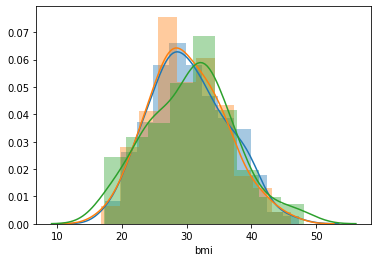

In [56]:
sns.distplot(b0),sns.distplot(b1),sns.distplot(b2)
# The distributions look alike visually as well